# Intro Code

Intro stuff

In [ ]:
# Basic imports
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

# Reading in book as whole string
with open('/content/drive/My Drive/Colab Notebooks/Diss/JamesJoyce-Ulysses.txt') as f:
    lines = f.read()

# Finding start of the book
start = lines[1005:]

# Separating each chapter using split
chapters = []

# Starting at 2 as we are taking the string before each next chapter
for i in range(2,19):

  # Creating string that will be used to split
  splitter = "[ " + str(i) + " ]"
  a = start.split(sep=splitter)

  # Each chapter is added to list
  chapters.append(a[0])

  # Remaining string is then put back through the loop for the next chapter
  start = a[1]


  # When at the penultimate chapter the remaining text is the last chapter
  if i == 18:
    chapters.append(a[1])

# Replacing each chapters linebreaks with spaces
for i in range(len(chapters)):
  chapters[i] = chapters[i].replace("\n", " ")

Mounted at /content/drive/


## sm Package

Basic Spacy NER detection

In [ ]:
# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load("en_core_web_sm")

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)




The list of locations I manually found

In [ ]:
chapter_3_list = ['Sandymount strand',
'Sandymount',
'Leahy’s terrace',
'Bride Street',
'Edenville',
'Mananaan',
'Strasburg terrace',
'Clongowes gentry',
'Marsh’s library',
'Alexandria',
'the Pigeonhouse',
'Paris',
'Egypt',
'Europe',
'Newhaven',
'Irlande',
'Barcelona',
'Ireland',
'Malahide',
'Clerkenwell',
'rue de la Goutte-d’Or',
'rue Gît-le-Cœur',
'France',
'Strongbow’s castle',
'the Nore',
'Kilkenny',
'Poolbeg road',
'Lochlanns',
'Maiden’s rock',
'Clongowes',
'Romeville',
'O’Loughlin’s of Blackpitts',
'Fumbally’s lane',
'Cassiopeia',
'Cloyne',
'Leeson park'
'Paris',
'Dublin Bar']

In [ ]:
len(chapter_3_list)

37

In [ ]:
# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

print('The entities that the NER found are:', found_ent)
print('The entities that the NER did not find are:', not_found_ent)

The entities that the NER found are: ['Sandymount', 'Bride Street', 'Edenville', 'Mananaan', 'Paris', 'Egypt', 'Europe', 'Barcelona', 'Ireland', 'Malahide', 'Clerkenwell', 'rue de la Goutte-d’Or', 'France', 'Lochlanns', 'Romeville', 'Cassiopeia', 'Cloyne']
The entities that the NER did not find are: ['Sandymount strand', 'Leahy’s terrace', 'Strasburg terrace', 'Clongowes gentry', 'Marsh’s library', 'Alexandria', 'the Pigeonhouse', 'Newhaven', 'Irlande', 'rue Gît-le-Cœur', 'Strongbow’s castle', 'the Nore', 'Kilkenny', 'Poolbeg road', 'Maiden’s rock', 'Clongowes', 'O’Loughlin’s of Blackpitts', 'Fumbally’s lane', 'Leeson parkParis', 'Dublin Bar']


In [ ]:
# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)
    print(ner_string, 'was not found')

maestro di color was not found
che was not found
Los Demiurgos was not found
Leahy was not found
Patk MacCabe was not found
navelcord was not found
Spouse was not found
Wombed was not found
Arius was not found
Airs was not found
Sara’s was not found
Strasburg was not found
Stephen was not found
Papa’s was not found
Uncle Richie was not found
backache was not found
Ferrando was not found
Marsh was not found
Temple was not found
Lanternjaws was not found
Descende was not found
the Blessed Virgin was not found
Serpentine was not found
Howth was not found
Armada was not found
Sara’s was not found
Qui was not found
MacMahon was not found
Michelet was not found
Moi was not found
mon père was not found
Proudly was not found
Le Tutu was not found
Pantalon Blanc et Culotte Rouge was not found
Mulligan was not found
Hannigan was not found
Rodot was not found
Hollandais was not found
Dalcassians was not found
Arthur Griffith was not found
Drumont was not found
Vieille was not found
Upsala was not

Checking if entities were filtered out incorrectly into other when they were found manually

In [ ]:
# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)
    print(ner_string, "was found")
    print(ner_string.label_)

Sandymount was found
WORK_OF_ART
Alexandria was found
PERSON
Newhaven was found
PERSON
Kilkenny was found
PERSON
Kilkenny was found
PERSON


Here we find some that were found that were misidentitified. Need to train the model

Finding statistical data on the accuracy.

TP - NER and manual found this entity

FP - Only NER found this entity

FN - Only manual found this entity or model misidentified it as wrong classifier.

TN - All entities found by NER that did not fit in classifiers apart from the ones that were mislabelled- NEED TO ASK ABOUT THIS DEFINITION

In [ ]:
sm_true_positive = len(found_ent)
sm_true_negative = len(other) - len(def_error)
sm_false_positive = len(false_found)
sm_false_negative = len(not_found_ent) + len(def_error)


Creating defs for accuracy, precision, recall and f1

In [ ]:
def precision(TP, FP):
  return TP / (TP + FP)
def recall(TP, FN):
  return TP / (TP + FN)
def f1(p, r):
  return (2 * p * r) / (p + r)
def accuracy(TP, TN, FP, FN):
  return (TP + TN) / (TP + FN + TN + FP)

### sm Summary

In [ ]:
def cf_matrix(true_negative, false_positive, false_negative, true_positive):
  return np.array([[ true_negative, false_positive],
                   [false_negative, true_positive ]])


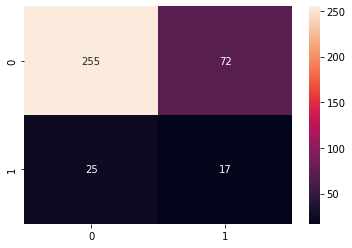

In [ ]:
import seaborn as sns
sm_cf = sns.heatmap(cf_matrix(sm_true_negative, sm_false_positive,
                              sm_false_negative, sm_true_positive),
                    annot=True, fmt='g')
sm_cf

In [ ]:
print(sm_true_positive)
print(sm_true_negative)
print(sm_false_positive)
print(sm_false_negative)

17
255
72
25


In [ ]:
sm_f1 = f1(precision(sm_true_positive, sm_false_positive),
                   recall(sm_true_positive, sm_false_negative))
sm_r = recall(sm_true_positive, sm_false_negative)
sm_p = precision(sm_true_positive, sm_false_positive)
sm_a = accuracy(sm_true_positive, sm_true_negative, sm_false_positive,
                sm_false_negative)
print("Accuracy is ", sm_a)
print("Precision is ", precision(sm_true_positive, sm_false_positive))
print("Recall is ", recall(sm_true_positive, sm_false_negative))
print("F1 is ", f1(precision(sm_true_positive, sm_false_positive),
                   recall(sm_true_positive, sm_false_negative)))

Accuracy is  0.7371273712737128
Precision is  0.19101123595505617
Recall is  0.40476190476190477
F1 is  0.2595419847328244


## md Package

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load("en_core_web_md")

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)


In [ ]:
# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

In [ ]:
md_true_positive = len(found_ent)
md_true_negative = len(other) - len(def_error)
md_false_positive = len(false_found)
md_false_negative = len(not_found_ent) + len(def_error)

### md Summary

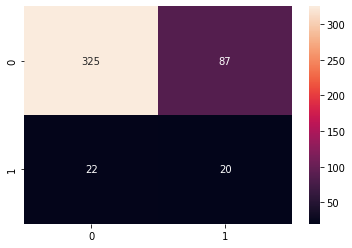

In [ ]:
md_cf = sns.heatmap(cf_matrix(md_true_negative, md_false_positive,
                              md_false_negative, md_true_positive),
                    annot=True, fmt='g')
md_cf

In [ ]:
print(md_true_positive)
print(md_true_negative)
print(md_false_positive)
print(md_false_negative)

20
325
87
22


In [ ]:
md_f1 = f1(precision(md_true_positive, md_false_positive),
                   recall(md_true_positive, md_false_negative))
md_r = recall(md_true_positive, md_false_negative)
md_p = precision(md_true_positive, md_false_positive)
md_a = accuracy(md_true_positive, md_true_negative, md_false_positive,
                md_false_negative)
print("Accuracy is ", md_a)
print("Precision is ", precision(md_true_positive, md_false_positive))
print("Recall is ", recall(md_true_positive, md_false_negative))
print("F1 is ", f1(precision(md_true_positive, md_false_positive),
                   recall(md_true_positive, md_false_negative)))

Accuracy is  0.7599118942731278
Precision is  0.18691588785046728
Recall is  0.47619047619047616
F1 is  0.2684563758389262


## lg Package

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load("en_core_web_lg")

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)


In [ ]:
# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

In [ ]:
lg_true_positive = len(found_ent)
lg_true_negative = len(other) - len(def_error)
lg_false_positive = len(false_found)
lg_false_negative = len(not_found_ent) + len(def_error)

### lg Summary

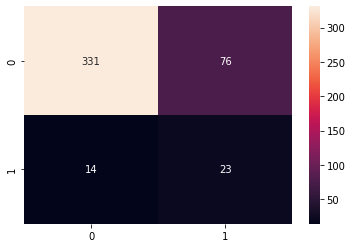

In [ ]:
lg_cf = sns.heatmap(cf_matrix(lg_true_negative, lg_false_positive,
                              lg_false_negative, lg_true_positive),
                    annot=True, fmt='g')
lg_cf

In [ ]:
print(lg_true_positive)
print(lg_true_negative)
print(lg_false_positive)
print(lg_false_negative)

23
331
76
14


In [ ]:
lg_f1 = f1(precision(lg_true_positive, lg_false_positive),
                   recall(lg_true_positive, lg_false_negative))
lg_r = recall(lg_true_positive, lg_false_negative)
lg_p = precision(lg_true_positive, lg_false_positive)
lg_a = accuracy(lg_true_positive, lg_true_negative, lg_false_positive,
                lg_false_negative)
print("Accuracy is ", lg_a)
print("Precision is ", precision(lg_true_positive, lg_false_positive))
print("Recall is ", recall(lg_true_positive, lg_false_negative))
print("F1 is ", f1(precision(lg_true_positive, lg_false_positive),
                   recall(lg_true_positive, lg_false_negative)))

Accuracy is  0.7972972972972973
Precision is  0.23232323232323232
Recall is  0.6216216216216216
F1 is  0.338235294117647


## trf Package

In [ ]:
!pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_trf")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load("en_core_web_trf")

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [ ]:
# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

In [ ]:
trf_true_positive = len(found_ent)
trf_true_negative = len(other) - len(def_error)
trf_false_positive = len(false_found)
trf_false_negative = len(not_found_ent) + len(def_error)

### trf Summary

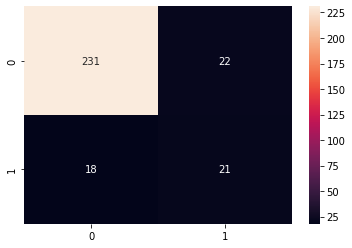

In [ ]:
trf_cf = sns.heatmap(cf_matrix(trf_true_negative, trf_false_positive,
                              trf_false_negative, trf_true_positive),
                    annot=True, fmt='g')
trf_cf

In [ ]:
print(trf_true_positive)
print(trf_true_negative)
print(trf_false_positive)
print(trf_false_negative)

21
231
22
18


In [ ]:
trf_f1 = f1(precision(trf_true_positive, trf_false_positive),
                   recall(trf_true_positive, trf_false_negative))
trf_r = recall(trf_true_positive, trf_false_negative)
trf_p = precision(trf_true_positive, trf_false_positive)
trf_a = accuracy(trf_true_positive, trf_true_negative, trf_false_positive,
                trf_false_negative)
print("Accuracy is ", trf_a)
print("Precision is ", precision(trf_true_positive, trf_false_positive))
print("Recall is ", recall(trf_true_positive, trf_false_negative))
print("F1 is ", f1(precision(trf_true_positive, trf_false_positive),
                   recall(trf_true_positive, trf_false_negative)))

Accuracy is  0.863013698630137
Precision is  0.4883720930232558
Recall is  0.5384615384615384
F1 is  0.5121951219512196


# Summary of all Models

In [ ]:
print( sm_f1, md_f1, lg_f1, trf_f1 )

0.2595419847328244 0.2684563758389262 0.338235294117647 0.5121951219512196


([<matplotlib.axis.XTick at 0x7faedd484e50>,
 [Text(0, 0, 'sm'), Text(0, 0, 'md'), Text(0, 0, 'lg'), Text(0, 0, 'trf')])

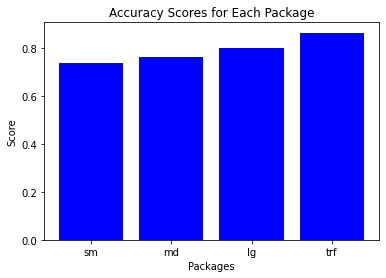

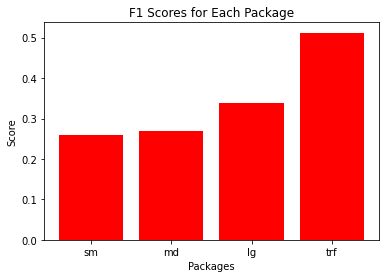

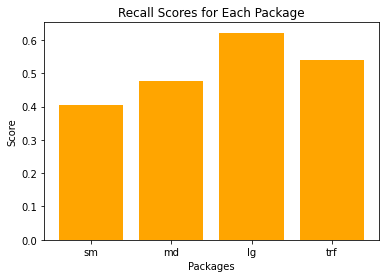

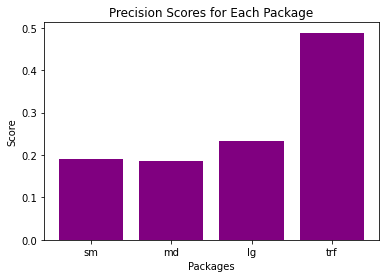

In [ ]:
import matplotlib.pyplot as plt

packages = ['sm', 'md', 'lg', 'trf']
f1s = [ sm_f1, md_f1, lg_f1, trf_f1 ]
recalls = [ sm_r, md_r, lg_r, trf_r ]
precisions = [ sm_p, md_p, lg_p, trf_p ]
accuracys = [ sm_a, md_a, lg_a, trf_a ]

x_pos = [i for i, _ in enumerate(packages)]

plt.figure(0)
plt.bar(x_pos, accuracys, color='blue')
plt.title("Accuracy Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(1)
plt.bar(x_pos, f1s, color='red')
plt.title("F1 Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(2)
plt.bar(x_pos, recalls, color='orange')
plt.title("Recall Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(3)
plt.bar(x_pos, precisions, color='purple')
plt.title("Precision Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)



Appears trf is the optimal and the one that was being used, sm is by far the worst.

# Training NERs

## sm Training

In [ ]:
from random import sample

In [ ]:
training_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Diss/training_data.csv')

In [ ]:
training_df['Names of Streets'][0]

'Mountbatten Close'

In [ ]:
training_data = []
for i in training_df['Names of Streets']:
  start = 0
  end = int(len(i))
  dic = {"entities": [(start,end, "FAC")]}
  tup = i,dic
  training_data.append(tup)

In [ ]:
training_data1 = sample(training_data, 40)

In [ ]:

training_data = [
    ("Coopper street is over there", {"entities": [(0, 14, "FAC")]}),
    ("I reached Ladder avenue yesterday.", {"entities": [(10, 23, "FAC")]}),
    ("It says Amberly terrace I think.", {"entities": [(8, 22, "FAC")]}),
    ("the Mitre is the local pub", {"entities": [(0, 8, "FAC")]}),
    ("carr's Libray has the best selection", {"entities": [(0, 12, "FAC")]}),
    ("stop by Lambert avenue", {"entities": [(8, 22, "FAC")]}),
    ("Is that the one on Carter close", {"entities": [(19, 31, "FAC")]}),
    ("I got this at the shop on the Gannersby", {"entities": [(26, 39, "FAC")]}),
    ("that is Borgan's castle", {"entities": [(8, 23, "FAC")]}),
    ("follow this road until gordon street", {"entities": [(23, 36, "FAC")]}),

]


In [ ]:
type(training_data1[0][1])

dict

In [ ]:
import spacy
import random
from spacy.training.example import Example
from spacy.util import minibatch, compounding
from pathlib import Path

updated_model_dir = '/content/drive/My Drive/Colab Notebooks/Diss/Training/sm'

## Update existing spacy model and store into a folder
def update_model(model='en_core_web_sm', output_dir=updated_model_dir, n_iter=30):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")


    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(training_data)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(training_data, size=compounding(4.0, 32.0, 1.001))

        for batch in spacy.util.minibatch(training_data, size=2):
          for text, annotations in batch:
            # create Example
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], losses=losses, drop=0.3)

    # test the trained model
    for text, _ in training_data:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

# Finally train the model by calling above function
update_model()

Loaded model 'en_core_web_sm'


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:152: UserWarning: [W030] Some entities could not be aligned in the text "It says Amberly terrace I think." with entities "[(8, 22, 'FAC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:152: UserWarning: [W030] Some entities could not be aligned in the text "carr's Libray has the best selection" with entities "[(0, 12, 'FAC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,
/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:152: UserWarning: [W030] Some entities could not be aligned in the 

Entities [('gordon street', 'FAC')]
Tokens [('follow', '', 2), ('this', '', 2), ('road', '', 2), ('until', '', 2), ('gordon', 'FAC', 3), ('street', 'FAC', 1)]
Entities [('Lambert avenue', 'FAC')]
Tokens [('stop', '', 2), ('by', '', 2), ('Lambert', 'FAC', 3), ('avenue', 'FAC', 1)]
Entities []
Tokens [('I', '', 2), ('got', '', 2), ('this', '', 2), ('at', '', 2), ('the', '', 2), ('shop', '', 2), ('on', '', 2), ('the', '', 2), ('Gannersby', '', 2)]
Entities [('Ladder avenue', 'FAC'), ('yesterday', 'DATE')]
Tokens [('I', '', 2), ('reached', '', 2), ('Ladder', 'FAC', 3), ('avenue', 'FAC', 1), ('yesterday', 'DATE', 3), ('.', '', 2)]
Entities []
Tokens [('It', '', 2), ('says', '', 2), ('Amberly', '', 2), ('terrace', '', 2), ('I', '', 2), ('think', '', 2), ('.', '', 2)]
Entities [('Carter', 'PERSON')]
Tokens [('Is', '', 2), ('that', '', 2), ('the', '', 2), ('one', '', 2), ('on', '', 2), ('Carter', 'PERSON', 3), ('close', '', 2)]
Entities [('Coopper street', 'FAC')]
Tokens [('Coopper', 'FAC', 3)

In [ ]:
# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load(updated_model_dir)

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)

In [ ]:
# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

In [ ]:
sm2_true_positive = len(found_ent)
sm2_true_negative = len(other) - len(def_error)
sm2_false_positive = len(false_found)
sm2_false_negative = len(not_found_ent) + len(def_error)

In [ ]:
sm2_f1 = f1(precision(sm2_true_positive, sm2_false_positive),
                   recall(sm2_true_positive, sm2_false_negative))
sm2_r = recall(sm2_true_positive, sm2_false_negative)
sm2_p = precision(sm2_true_positive, sm2_false_positive)
sm2_a = accuracy(sm2_true_positive, sm2_true_negative, sm2_false_positive,
                sm2_false_negative)
print("Accuracy is ", sm2_a)
print("Precision is ", precision(sm2_true_positive, sm2_false_positive))
print("Recall is ", recall(sm2_true_positive, sm2_false_negative))
print("F1 is ", f1(precision(sm2_true_positive, sm2_false_positive),
                   recall(sm2_true_positive, sm2_false_negative)))

Accuracy is  0.6909090909090909
Precision is  0.15789473684210525
Recall is  0.43902439024390244
F1 is  0.23225806451612904


([<matplotlib.axis.XTick at 0x7faed99b1cd0>,
 [Text(0, 0, 'sm'), Text(0, 0, 'sm trained')])

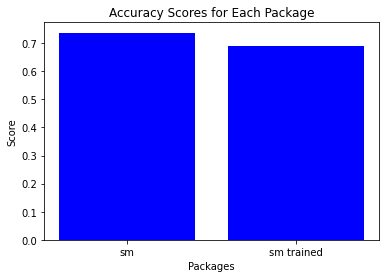

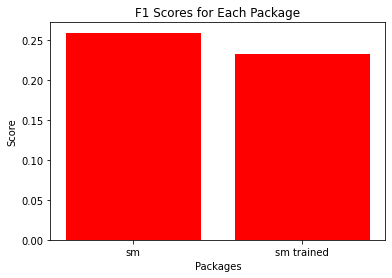

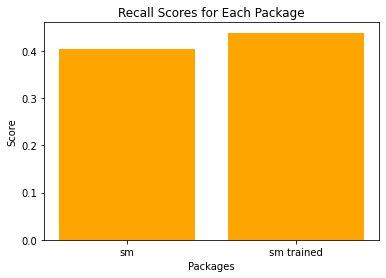

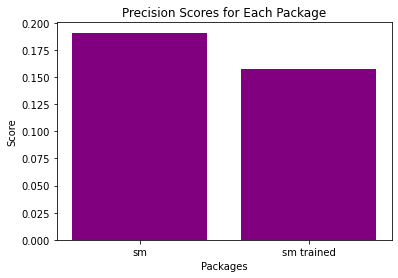

In [ ]:
import matplotlib.pyplot as plt

packages = ['sm', 'sm trained']
f1s = [ sm_f1, sm2_f1]
recalls = [ sm_r, sm2_r]
precisions = [ sm_p, sm2_p]
accuracys = [ sm_a, sm2_a]

x_pos = [i for i, _ in enumerate(packages)]

plt.figure(0)
plt.bar(x_pos, accuracys, color='blue')
plt.title("Accuracy Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(1)
plt.bar(x_pos, f1s, color='red')
plt.title("F1 Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(2)
plt.bar(x_pos, recalls, color='orange')
plt.title("Recall Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(3)
plt.bar(x_pos, precisions, color='purple')
plt.title("Precision Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

## md Training

In [ ]:
updated_model_dir = '/content/drive/My Drive/Colab Notebooks/Diss/Training/md'

## Update existing spacy model and store into a folder
def update_model(model='en_core_web_md', output_dir=updated_model_dir, n_iter=30):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")


    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(training_data)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(training_data, size=compounding(4.0, 32.0, 1.001))

        for batch in spacy.util.minibatch(training_data, size=2):
          for text, annotations in batch:
            # create Example
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], losses=losses, drop=0.3)

    # test the trained model
    for text, _ in training_data:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

# Finally train the model by calling above function
update_model()

# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load(updated_model_dir)

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)

# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

md2_true_positive = len(found_ent)
md2_true_negative = len(other) - len(def_error)
md2_false_positive = len(false_found)
md2_false_negative = len(not_found_ent) + len(def_error)

md2_f1 = f1(precision(md2_true_positive, md2_false_positive),
                   recall(md2_true_positive, md2_false_negative))
md2_r = recall(md2_true_positive, md2_false_negative)
md2_p = precision(md2_true_positive, md2_false_positive)
md2_a = accuracy(md2_true_positive, md2_true_negative, md2_false_positive,
                md2_false_negative)
print("Accuracy is ", md2_a)
print("Precision is ", precision(md2_true_positive, md2_false_positive))
print("Recall is ", recall(md2_true_positive, md2_false_negative))
print("F1 is ", f1(precision(md2_true_positive, md2_false_positive),
                   recall(md2_true_positive, md2_false_negative)))

Loaded model 'en_core_web_md'
Entities [('Coopper street', 'FAC')]
Tokens [('Coopper', 'FAC', 3), ('street', 'FAC', 1), ('is', '', 2), ('over', '', 2), ('there', '', 2)]
Entities [('Amberly terrace', 'FAC')]
Tokens [('It', '', 2), ('says', '', 2), ('Amberly', 'FAC', 3), ('terrace', 'FAC', 1), ('I', '', 2), ('think', '', 2), ('.', '', 2)]
Entities [('Ladder avenue', 'FAC'), ('yesterday', 'DATE')]
Tokens [('I', '', 2), ('reached', '', 2), ('Ladder', 'FAC', 3), ('avenue', 'FAC', 1), ('yesterday', 'DATE', 3), ('.', '', 2)]
Entities [('Lambert avenue', 'FAC')]
Tokens [('stop', '', 2), ('by', '', 2), ('Lambert', 'FAC', 3), ('avenue', 'FAC', 1)]
Entities [('Carter close', 'FAC')]
Tokens [('Is', '', 2), ('that', '', 2), ('the', '', 2), ('one', '', 2), ('on', '', 2), ('Carter', 'FAC', 3), ('close', 'FAC', 1)]
Entities [("Borgan's", 'ORG')]
Tokens [('that', '', 2), ('is', '', 2), ('Borgan', 'ORG', 3), ("'s", 'ORG', 1), ('castle', '', 2)]
Entities [('gordon street', 'FAC')]
Tokens [('follow', '',

## lg Training

In [ ]:
updated_model_dir = '/content/drive/My Drive/Colab Notebooks/Diss/Training/lg'

## Update existing spacy model and store into a folder
def update_model(model='en_core_web_lg', output_dir=updated_model_dir, n_iter=30):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")


    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(training_data)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(training_data, size=compounding(4.0, 32.0, 1.001))

        for batch in spacy.util.minibatch(training_data, size=2):
          for text, annotations in batch:
            # create Example
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], losses=losses, drop=0.3)

    # test the trained model
    for text, _ in training_data:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

# Finally train the model by calling above function
update_model()

# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load(updated_model_dir)

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)

# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

lg2_true_positive = len(found_ent)
lg2_true_negative = len(other) - len(def_error)
lg2_false_positive = len(false_found)
lg2_false_negative = len(not_found_ent) + len(def_error)

lg2_f1 = f1(precision(lg2_true_positive, lg2_false_positive),
                   recall(lg2_true_positive, lg2_false_negative))
lg2_r = recall(lg2_true_positive, lg2_false_negative)
lg2_p = precision(lg2_true_positive, lg2_false_positive)
lg2_a = accuracy(lg2_true_positive, lg2_true_negative, lg2_false_positive,
                lg2_false_negative)
print("Accuracy is ", lg2_a)
print("Precision is ", precision(lg2_true_positive, lg2_false_positive))
print("Recall is ", recall(lg2_true_positive, lg2_false_negative))
print("F1 is ", f1(precision(lg2_true_positive, lg2_false_positive),
                   recall(lg2_true_positive, lg2_false_negative)))

Loaded model 'en_core_web_lg'
Entities []
Tokens [('I', '', 2), ('got', '', 2), ('this', '', 2), ('at', '', 2), ('the', '', 2), ('shop', '', 2), ('on', '', 2), ('the', '', 2), ('Gannersby', '', 2)]
Entities [('Ladder avenue', 'FAC'), ('yesterday', 'DATE')]
Tokens [('I', '', 2), ('reached', '', 2), ('Ladder', 'FAC', 3), ('avenue', 'FAC', 1), ('yesterday', 'DATE', 3), ('.', '', 2)]
Entities [('Amberly', 'PERSON')]
Tokens [('It', '', 2), ('says', '', 2), ('Amberly', 'PERSON', 3), ('terrace', '', 2), ('I', '', 2), ('think', '', 2), ('.', '', 2)]
Entities [('Lambert avenue', 'FAC')]
Tokens [('stop', '', 2), ('by', '', 2), ('Lambert', 'FAC', 3), ('avenue', 'FAC', 1)]
Entities [('gordon street', 'FAC')]
Tokens [('follow', '', 2), ('this', '', 2), ('road', '', 2), ('until', '', 2), ('gordon', 'FAC', 3), ('street', 'FAC', 1)]
Entities [('Carter', 'PERSON')]
Tokens [('Is', '', 2), ('that', '', 2), ('the', '', 2), ('one', '', 2), ('on', '', 2), ('Carter', 'PERSON', 3), ('close', '', 2)]
Entities 

## trf Training

In [ ]:
'''
updated_model_dir = '/content/drive/My Drive/Colab Notebooks/Diss/Training/trf'

## Update existing spacy model and store into a folder
def update_model(model='en_core_web_trf', output_dir=updated_model_dir, n_iter=30):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")


    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(training_data)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(training_data, size=compounding(4.0, 32.0, 1.001))

        for batch in spacy.util.minibatch(training_data, size=2):
          for text, annotations in batch:
            # create Example
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], losses=losses, drop=0.3)

    # test the trained model
    for text, _ in training_data:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

# Finally train the model by calling above function
update_model()

# Importing SpaCy and relevent packages
import spacy
from spacy import displacy

# Loading NER
NER = spacy.load(updated_model_dir)

# Using chapter 3 as the text
text = chapters[2]

# Using NER on test
test = NER(text)

# Creating blank list for the entities
fin =[]
other = []
# Looping the entities that are found and their label
for ent in test.ents:

  # Adding dublin, ireland to each text
  address = ent
  # Implementing truth statement to filter the entities we want
  if ent.label_ == "ORG":
    fin.append(address)
  if ent.label_ == "LOC":
    fin.append(address)
  if ent.label_ == "GPE":
    fin.append(address)
  if ent.label_ == "FAC":
    fin.append(address)
  else:
    other.append(address)

# Checking if manually checked locationas are also found by NER
found_ent=[]
not_found_ent=[]
for manual_string in chapter_3_list:
  if manual_string not in str(fin):
    not_found_ent.append(manual_string)
  else:
    found_ent.append(manual_string)

# Checking if NER extracts more entities that are not locations
false_found = []
for ner_string in fin:
  if str(ner_string) not in chapter_3_list:
    false_found.append(ner_string)

# Checking if NER filters out entities that are actually correct
poss_error = []
def_error = []
for ner_string in other:
  if str(ner_string) in chapter_3_list:
    poss_error.append(ner_string)
for ner_string in poss_error:
  if ner_string not in fin:
    def_error.append(ner_string)

trf2_true_positive = len(found_ent)
trf2_true_negative = len(other) - len(def_error)
trf2_false_positive = len(false_found)
trf2_false_negative = len(not_found_ent) + len(def_error)

trf2_f1 = f1(precision(trf2_true_positive, trf2_false_positive),
                   recall(trf2_true_positive, trf2_false_negative))
trf2_r = recall(trf2_true_positive, trf2_false_negative)
trf2_p = precision(trf2_true_positive, trf2_false_positive)
trf2_a = accuracy(trf2_true_positive, trf2_true_negative, trf2_false_positive,
                trf2_false_negative)
print("Accuracy is ", trf2_a)
print("Precision is ", precision(trf2_true_positive, trf2_false_positive))
print("Recall is ", recall(trf2_true_positive, trf2_false_negative))
print("F1 is ", f1(precision(trf2_true_positive, trf2_false_positive),
                   recall(trf2_true_positive, trf2_false_negative)))
'''

'\nupdated_model_dir = \'/content/drive/My Drive/Colab Notebooks/Diss/Training/trf\'\n\n## Update existing spacy model and store into a folder\ndef update_model(model=\'en_core_web_trf\', output_dir=updated_model_dir, n_iter=30):\n    """Load the model, set up the pipeline and train the entity recognizer."""\n    if model is not None:\n        nlp = spacy.load(model)  # load existing spaCy model\n        print("Loaded model \'%s\'" % model)\n    else:\n        nlp = spacy.blank("en")  # create blank Language class\n        print("Created blank \'en\' model")\n\n    # create the built-in pipeline components and add them to the pipeline\n    # nlp.create_pipe works for built-ins that are registered with spaCy\n    if "ner" not in nlp.pipe_names:\n        ner = nlp.create_pipe("ner")\n        nlp.add_pipe(ner, last=True)\n    # otherwise, get it so we can add labels\n    else:\n        ner = nlp.get_pipe("ner")\n\n\n    # get names of other pipes to disable them during training\n    other

# Summary of Training Models

([<matplotlib.axis.XTick at 0x7faee45b0510>,
 [Text(0, 0, 'sm'),
  Text(0, 0, 'sm trained'),
  Text(0, 0, 'md'),
  Text(0, 0, 'md trained'),
  Text(0, 0, 'lg'),
  Text(0, 0, 'lg trained'),
  Text(0, 0, 'trf')])

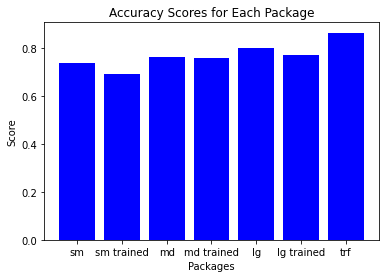

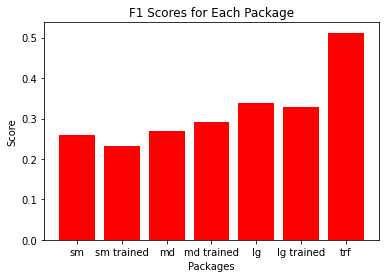

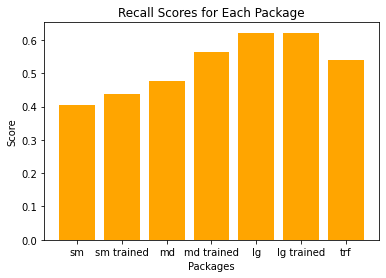

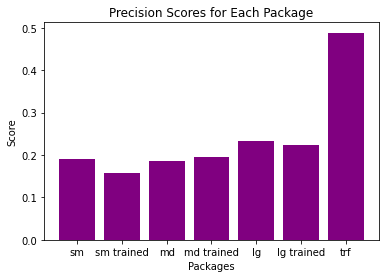

In [ ]:
import matplotlib.pyplot as plt

packages = ['sm', 'sm trained', 'md', 'md trained', 'lg', 'lg trained',
            'trf']
f1s = [ sm_f1, sm2_f1, md_f1, md2_f1, lg_f1, lg2_f1, trf_f1]
recalls = [ sm_r, sm2_r, md_r, md2_r, lg_r, lg2_r, trf_r]
precisions = [ sm_p, sm2_p, md_p, md2_p, lg_p, lg2_p, trf_p]
accuracys = [ sm_a, sm2_a, md_a, md2_a, lg_a, lg2_a, trf_a]

x_pos = [i for i, _ in enumerate(packages)]

plt.figure(0)
plt.bar(x_pos, accuracys, color='blue')
plt.title("Accuracy Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(1)
plt.bar(x_pos, f1s, color='red')
plt.title("F1 Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(2)
plt.bar(x_pos, recalls, color='orange')
plt.title("Recall Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)

plt.figure(3)
plt.bar(x_pos, precisions, color='purple')
plt.title("Precision Scores for Each Package")
plt.xlabel("Packages")
plt.ylabel("Score")
plt.xticks(x_pos, packages)